# Защита персональных данных клиентов

Задача проекта -  защитить данные клиентов страховой компании «Хоть потоп».

Цель - разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 
При этом нужно защитить данные так, чтобы при преобразовании качество модели (Линейная регрессия) машинного обучения не ухудшилось. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

Выполним импорт библиотек, необходимых для выполнения кода:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Сохраним данные из csv-файла в переменной data:

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/natalliakarnilava/personal_data_protection/main/insurance.csv')


Выведем на экран первые строчки датасета:

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Выведем более подробную информацию о таблице при помощи методов: info() и describe():

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В датасете 5000 записей, нет пропусков, тип данных для каждого из столбцов соответствует содержанию. 

In [5]:
data.describe(include='all')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Изучим корреляцию признаков. Для этого с помощью библиотеки seaborn построим график heatmap, который будет отображать коэффициент корреляции между признаками:

<AxesSubplot:>

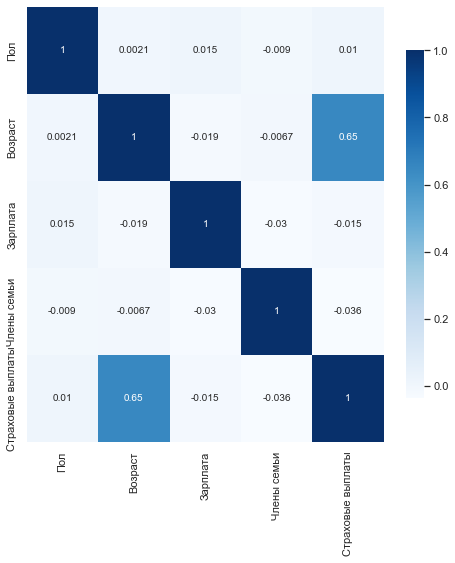

In [6]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1)
sns.heatmap(data.corr(), annot = True, fmt='.2g', cmap= 'Blues', annot_kws={"fontsize":10}, cbar_kws={"shrink": .8})

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>
<hr>    
<b>Совет💡:</b> Чтобы не выводить над графиком лишнюю информацию, используй <code>show</code> из <code>matplotlib.pyplot</code> или <code>;</code>. <code>;</code> позволяет исключить неявное применение функции <code>display</code> для последней строки в ячейке.
        
Хорошо бы график тоже с заголовком выводить.
</div></div>

Как видим, есть зависимость между признаками "Страховые выплаты" и "Возраст". Величина коэффициента корреляции равна 0.65, что свидетельствует о заметной корреляции.

Для наглядного отображения данных из таблицы, полученной методом describe(), построим гистограммы часто для каждого из столбцов:

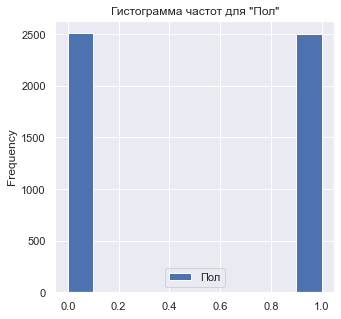

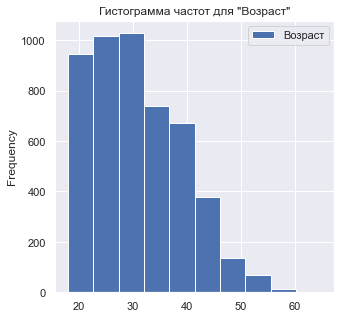

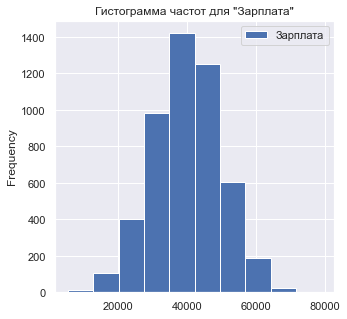

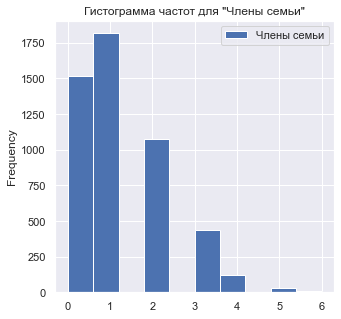

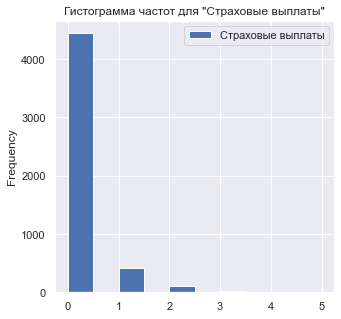

In [7]:
columns = data.columns
for column in columns:
    data[column].plot(kind='hist',figsize=(5,5), grid=True, legend=True, title=f'Гистограмма частот для "{column}"')
    plt.show()

In [8]:
data['Страховые выплаты'].value_counts(normalize=True)

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

### Вывод:
* В столбце "Пол" содержится 2 значения - 0 и 1. Их количество сопоставимо. 


* В столбце "Возраст" данные распределены со смещением. Значение возраста находится в промежутке от 18 до 65 лет. Минимальное значение обусловено тем, что страховая компания может заключить договор только с совершеннолетним человеком. Половина значений находится в промежутке от 24 до 37 лет. Значение медианы - 30 лет. Максимальное значение в 65 лет, вероятно, обусловлено политикой страховой компании (свыше 65 лет риск выплаты страхового возмещения неприемлемо высок). Это  подтверждается выявленным значением корреляции между признаками "Страховые выплаты" и "Возраст" - 0.65 (заметная корреляция). 


* В столбце "Зарплата" данные распределены нормально. Значения находятся в диапазоне от 5300 до 79000. Медианна равна 40200.


* В столбце "Члены семьи" значения находятся в диапазоне от 0 до 6. Вероятно, значение 0 означает, что человек не женат/ не замужем, 1 - женат/замужем и без детей, 2 - женат/замужем и с 1 ребенком и т.д. Половина значений находится в диапазоне от 0 до 2, значение равное 6 - является выбросом. Медиана равна 1. 


* В столбце "Страховые выплаты" указано количество страховых выплат клиенту за последние 5 лет. Значения столбца находятся в диапазоне от 0 до 5. 88% всех клиентов не получает ни одной выплаты в течение 5 лет. Порядка 3% клиентов 2 и более выплат в течение 5 лет. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**

**Ответ:** **b. Не изменится.** 

**Обоснование:** 
Докажем, что качаство модели не изменится.

Из условия задачи мы имеем матрицу признаков X и вектор весов w, вектор целевого признака y. Тогда вектор предсказаний а равен:

$$
a = Xw
$$

Согласно формуле обучения, вектор весов w можно выразить следующим образом:

$$
w = (X^T X)^{-1} X^T y        
$$

Пусть С - новая матрица, полученная в результате умножения матрицы Х на обратимую (а значит квадратную) матрицу Р:
$$
C = XP
$$

Тогда по формуле обучения новый вектор весов w1 будет равен:

$$
w_1 = (C^{T}C)^{-1}C^{T}y
$$


Разобьем это выражение на две части:

(1) 
$(C^{T}C)^{-1}$

(2) $C^{T}y$

(1) Согласно свойствам транспонирования матриц:

$$
(C^{T}C)^{-1} = ((XP)^{T}(XP))^{-1} = (P^{T}(X^{T}X)P)^{-1}
$$

Согласно свойствам обратной матрицы:

$$
(P^{T}(X^{T}X)P)^{-1} = P^{-1}(X^{T}X)^{-1}(P^{T})^{-1}
$$

(2) Согласно свойствам транспонирования матриц:

$$
C^{T}y = (XP)^{T}y = P^{T}X^{T}y
$$

Из (1) и (2) получаем:

$$
w_1 = (C^{T}C)^{-1}C^{T}y = 
$$
$$
$$
$$
=  P^{-1}(X^{T}X)^{-1}(P^{T})^{-1}P^{T}X^{T}y = 
$$
$$
$$
$$
= P^{-1}(X^{T}X)^{-1}EX^{T}y = 
$$
$$
$$
$$
= P^{-1}(X^{T}X)^{-1}X^{T}y = 
$$
$$
$$
$$
= P^{-1}((X^{T}X)^{-1}X^{T})y = 
$$
$$
$$
$$
= P^{-1}w
$$

Тогда новый вектор предсказаний a1 будет равен:

$$
a_1 = Cw_1 = (XP)(P^{-1}w) = XPP^{-1}w = XEw = Xw = a
$$

Таким образом, при умножении матрицы Х на обратимую матрицу Р получим вектор предсказаний а1 равный а. 

Следовательно, качество модели останется прежним.

Что и требовалось доказать.

## Алгоритм преобразования

**Алгоритм**



In [9]:
class DataReaderEncrypter():
    
    def read(self, path):
        data = pd.read_csv(path)
        target = data['Страховые выплаты']
        data = data.drop('Страховые выплаты', axis = 1)
        columns = data.columns
        inversible_matrix = np.zeros(shape = (len(data.columns), len(data.columns)))
        invert_exsist = True
        while invert_exsist:
            try:
                inversible_matrix = np.random.normal(size=(len(data.columns), len(data.columns)))
                np.linalg.inv(inversible_matrix)
                invert_exsist = False
            except:
                invert_exsist = True
                
                    
        data = data.values @ inversible_matrix
        data = pd.DataFrame(data=data, columns = columns)
        data['Страховые выплаты'] = target
        
        return data        

**Обоснование**
Нам нужно защитить данные так, чтобы работа моделей машинного обучения не ухудшилась, при этом нельзя было понять, какими были изначальные данные. 
С помощью алгоритма мы сможем получить таблицу, которая не будет иметь ничего общего с изначальной, данные не будут автоматически считываться (как например, пол).  Их значения будут как отрицательными, так и положительными, как целыми, так и с дробной частью. Это достигается при помощи матричного умножения значений таблицы на случайную матрицу.  Именно работа со случайно созданной матрицей позволит нам быть уверенными, что данные не восстановят, так как "ключ" от шифрования нигде не будет хранится. А сам принцип матричного умножения позволит нам уйти от простейших зависимостей новых значений от старых (например, как умножение на какой-то коэффициент всех значений).


Алгоритм преобразования - это создание объекта класса DataReaderEncrypter, метод read() которого принимает путь к исходному csv-файлу, а возвращает таблицу с измененными признаками. 
Ранее мы доказали, что при умножении исходных признаков на обратимую матрицу качество модели не изменится. Поэтому в методе 'read' мы генерируем случайную квадратную матрицу с размерностью nxn, где n - количество признаков. Так есть небольшая вероятность того, что созданная случайным образом матрица не будет иметь обратной, то мы осуществляем проверку наличия обратной матрицы. И только убедившись в том, что такая существует - умножаем исходные признаки на сгенерированную матрицу.

## Проверка алгоритма

Создадим функцию check_r2(data), которая будет принимать таблицу, а возвращать значение метрики R2, округленное до 10 знаков после запятой. Внутри метода будет создаваться и обучаться модель линейной регрессии, а также производиться масштабирование признаков с помощью StandardScaler():

In [10]:
def check_r2(data):
    features = data.drop('Страховые выплаты', axis = 1)
    target = data['Страховые выплаты']
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    r2 = r2_score(target_test, predictions, multioutput='variance_weighted')
    return round(r2, 10)
    

Сохраним датасет в переменную encrypted_data, используя класс DataReaderEncrypter() и его метод read():

In [12]:
dre = DataReaderEncrypter()
encrypted_data = dre.read('https://raw.githubusercontent.com/natalliakarnilava/personal_data_protection/main/insurance.csv')


Проверим равенство метрик: 

In [13]:
print(check_r2(data)==check_r2(encrypted_data))

True


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2<a class="tocSkip"> </h2>
<hr>    
<b>Совет💡:</b> Можно ещё небольшое заключение в контексте задачи написать.
</div></div>